In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from torch import nn

### 1. 数据集构造

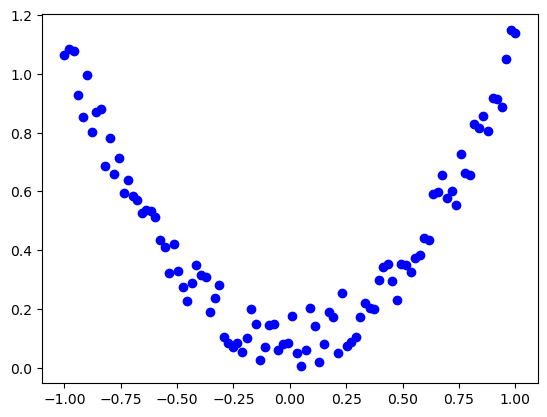

In [2]:
x = np.linspace(-1, 1, 100)
y = x**2 + np.random.rand(100)*0.2
plt.plot(x, y, 'bo')
plt.show()

### 2. numpy array -> pytorch tensor -> Variable

In [3]:
x = torch.unsqueeze(torch.Tensor(x),1)
y = torch.unsqueeze(torch.Tensor(y),1)
x = Variable(x)
y = Variable(y)

In [4]:
print(x.shape, y.shape)

torch.Size([100, 1]) torch.Size([100, 1])


### 3. 网络构造

In [7]:
class Net(torch.nn.Module):  # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = nn.Linear(n_hidden, n_output)   # 输出层线性输出

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = nn.functional.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x

### 4. 实例化网络、损失和优化器

In [8]:
net = Net(n_feature=1, n_hidden=20, n_output=1)  # 实例化网络
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习率
loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)

### 5. 训练（无minibatch、无测试集）

In [9]:
for t in range(500):
    prediction = net(x)              # 喂给 net 训练数据 x, 输出预测值
    loss = loss_func(prediction, y)  # 计算两者的误差
    optimizer.zero_grad()            # 清空上一步的残余更新参数值
    loss.backward()                  # 误差反向传播, 计算参数更新值
    optimizer.step()                 # 将参数更新值施加到 net 的 parameters 上
    if t % 50 == 0:
        print('Loss of epoch %s is %f'%(t, loss.data.numpy()))

Loss of epoch 0 is 0.695668
Loss of epoch 50 is 0.016203
Loss of epoch 100 is 0.007198
Loss of epoch 150 is 0.005771
Loss of epoch 200 is 0.005067
Loss of epoch 250 is 0.004696
Loss of epoch 300 is 0.004415
Loss of epoch 350 is 0.004224
Loss of epoch 400 is 0.004104
Loss of epoch 450 is 0.003984


#### 5.1 其他网络写法

In [13]:
class Net2(nn.Module):  # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net2, self).__init__()     # 继承 __init__ 功能
        # 使用Sequential定义
        self.model = nn.Sequential(
            nn.Linear(n_feature,n_hidden),
            nn.Sigmoid(),
            nn.Linear(n_hidden, n_output)
        )

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = self.model(x)             # 输出值
        return x

net = Net2(n_feature=1, n_hidden=20, n_output=1)  # 实例化网络

### 6. 两个隐藏层（1-20-20-1）与训练

In [17]:
class Net3(nn.Module):
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_output):
        super(Net3, self).__init__()
        # 使用Sequential定义
        self.model = nn.Sequential(
            nn.Linear(n_feature,n_hidden1),
            nn.ReLU(),
            nn.Linear(n_hidden1, n_hidden2),   # 2个hidden layer
            nn.ReLU(),
            nn.Linear(n_hidden2, n_output)
        )

    def forward(self, x):
        x = self.model(x)             # 输出值
        return x
net = Net3(n_feature=1, n_hidden1=20, n_hidden2=20, n_output=1)  # 实例化网络

In [16]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习率
loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)

for t in range(500):
    prediction = net(x)              # 喂给 net 训练数据 x, 输出预测值
    loss = loss_func(prediction, y)  # 计算两者的误差
    optimizer.zero_grad()            # 清空上一步的残余更新参数值
    loss.backward()                  # 误差反向传播, 计算参数更新值
    optimizer.step()                 # 将参数更新值施加到 net 的 parameters 上
    if t % 50 == 0:
        print('Loss of epoch %s is %f'%(t, loss.data.numpy()))

Loss of epoch 0 is 0.206699
Loss of epoch 50 is 0.015671
Loss of epoch 100 is 0.009709
Loss of epoch 150 is 0.004478
Loss of epoch 200 is 0.004006
Loss of epoch 250 is 0.003805
Loss of epoch 300 is 0.003894
Loss of epoch 350 is 0.004177
Loss of epoch 400 is 0.004252
Loss of epoch 450 is 0.004204


#### 6.1 其他网络写法

In [15]:
net = nn.Sequential(
    nn.Linear(1, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

#### 6.2 动图绘制  run in .py (idle or pycharm)，not run in jupyter notebook

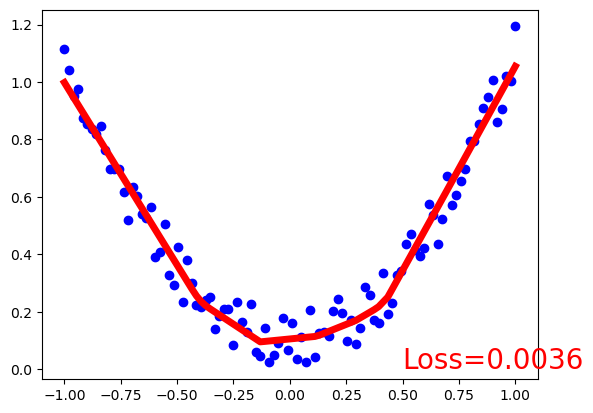

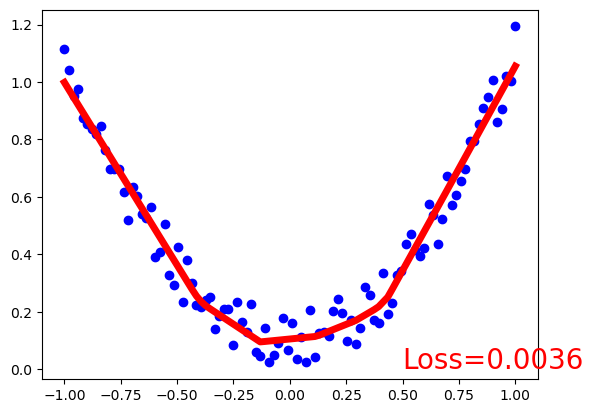

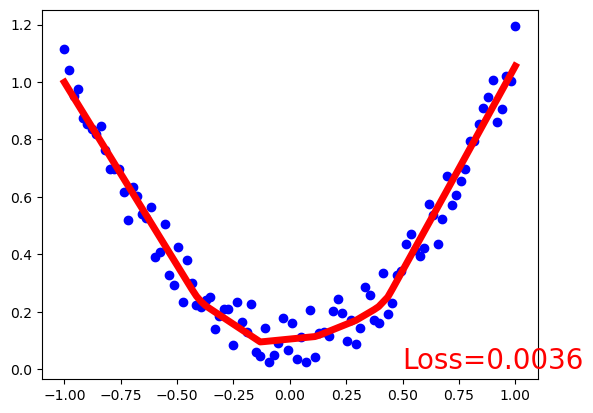

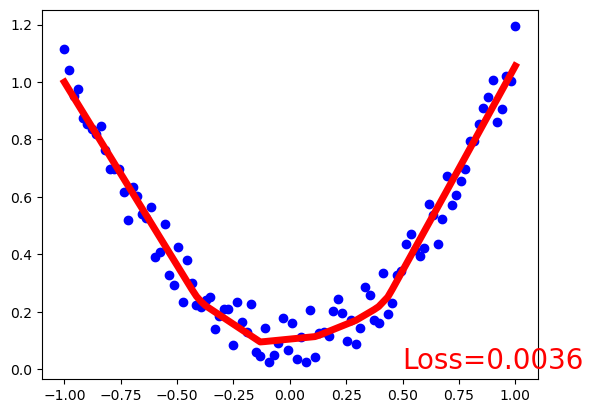

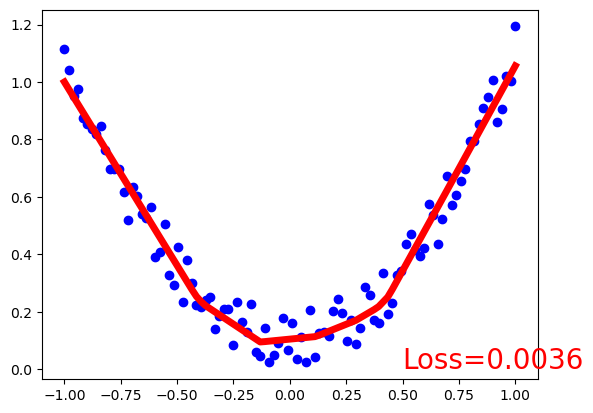

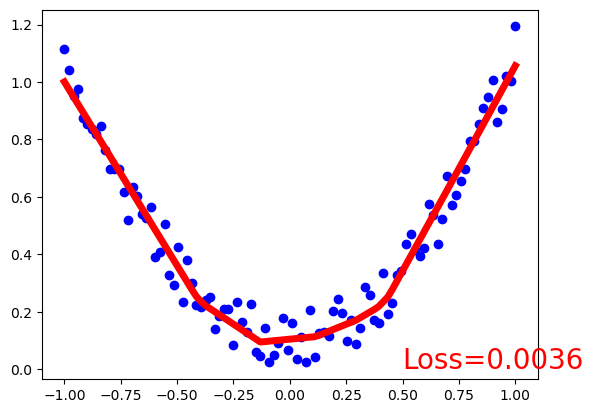

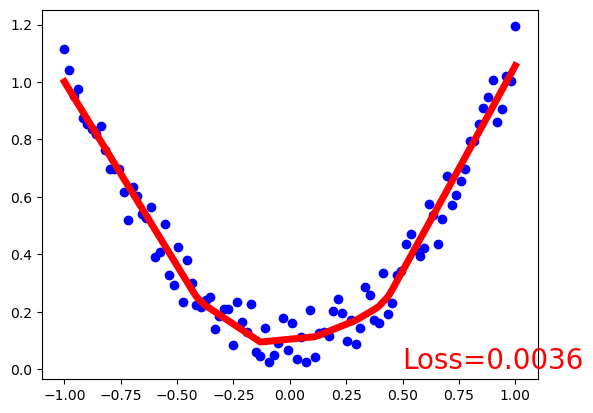

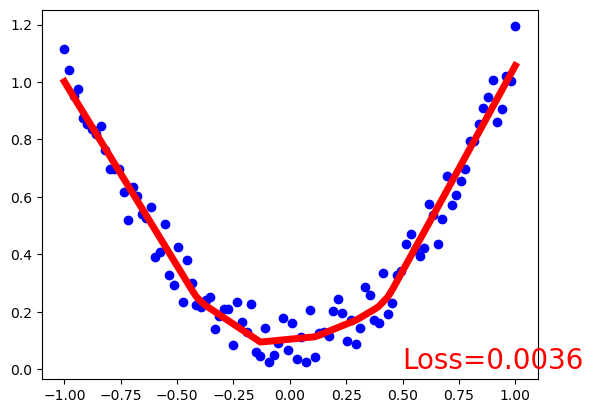

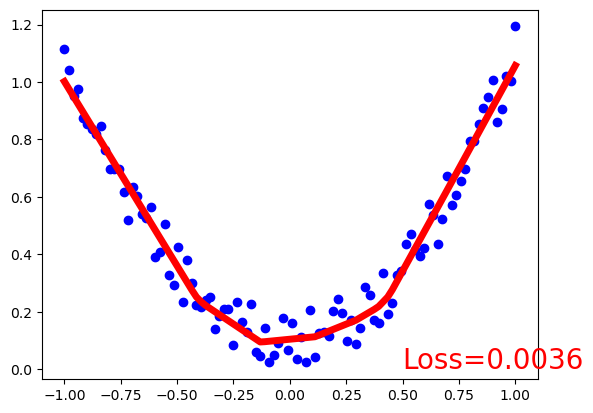

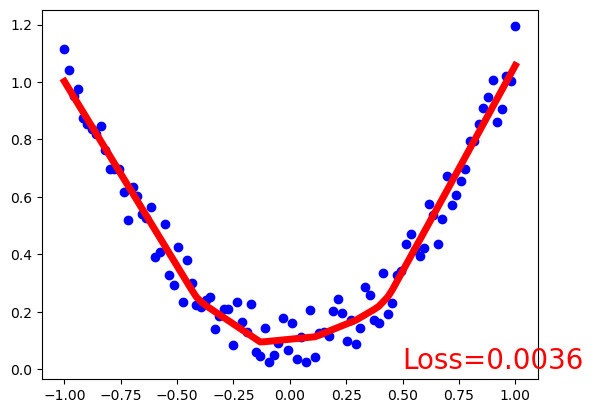

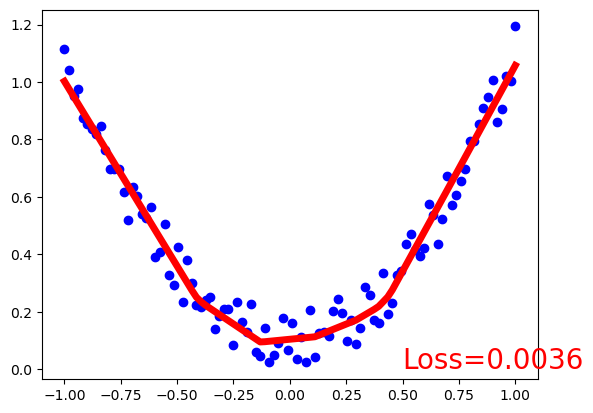

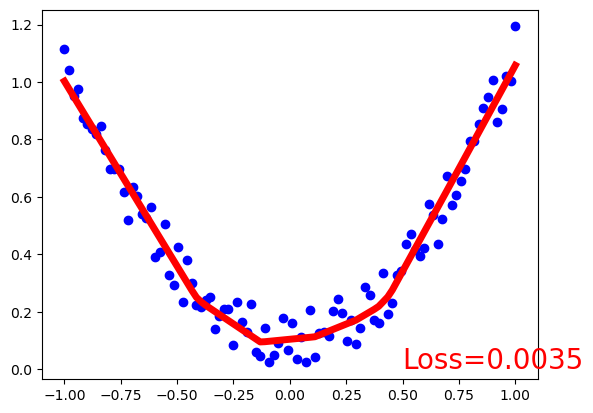

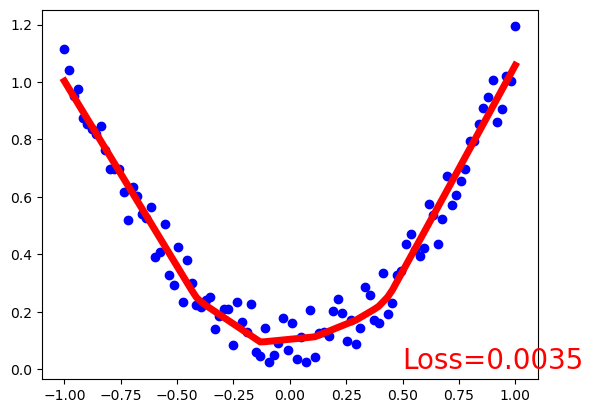

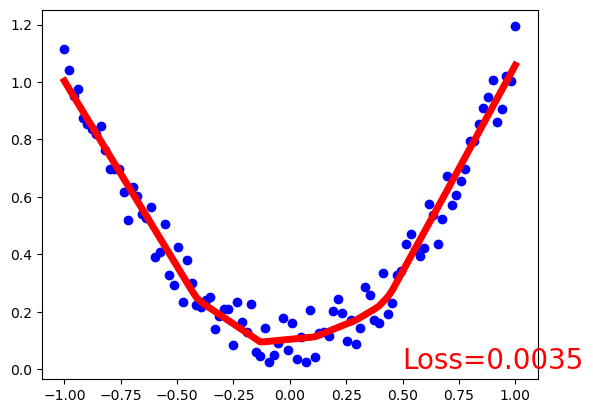

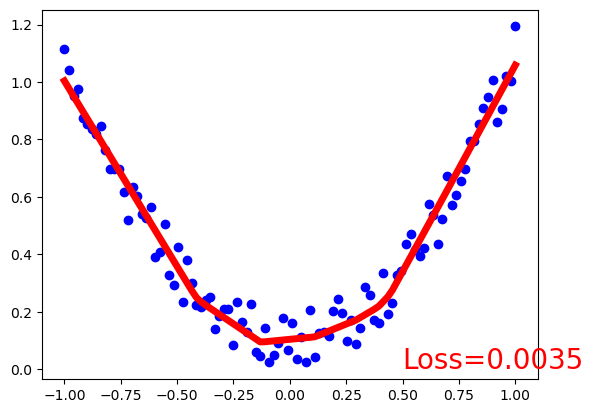

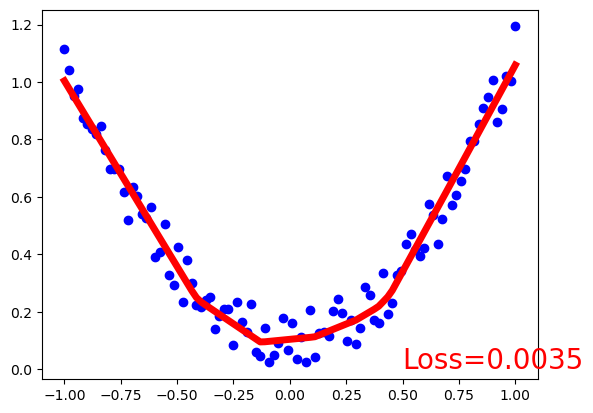

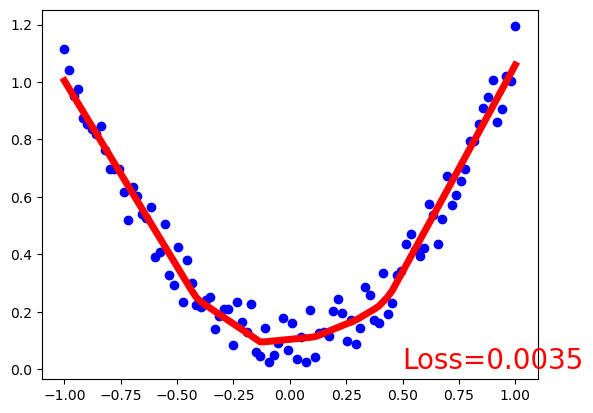

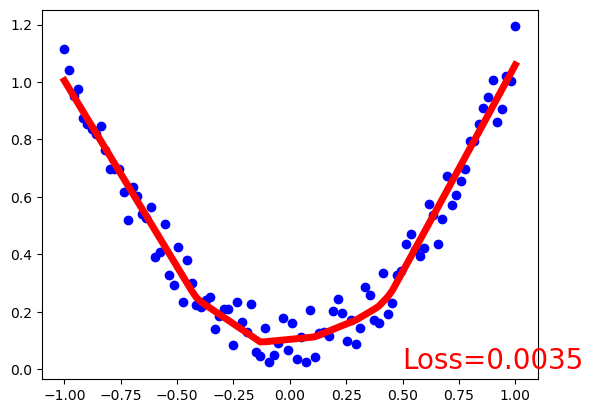

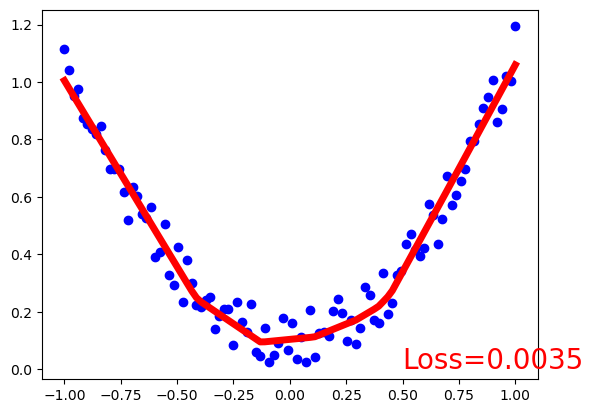

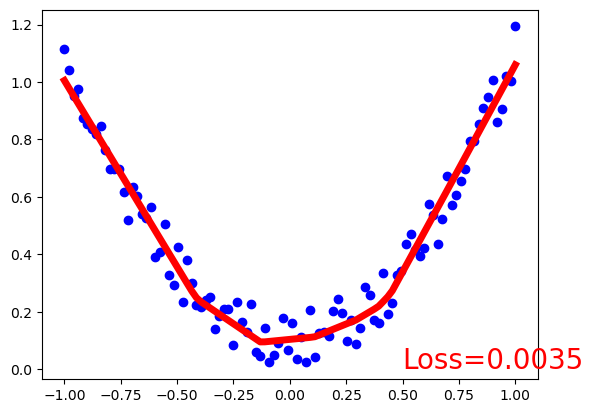

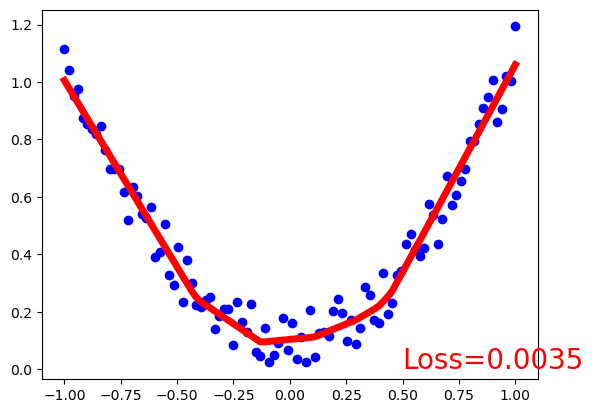

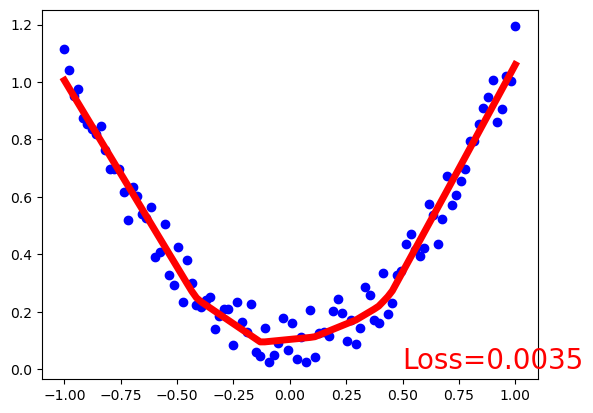

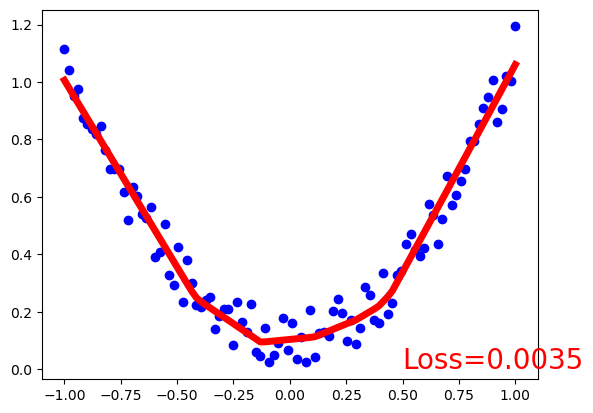

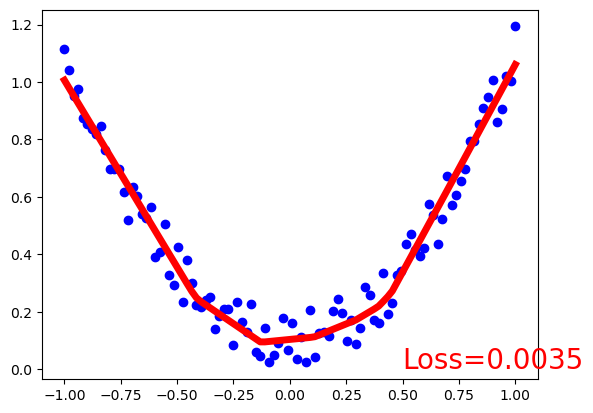

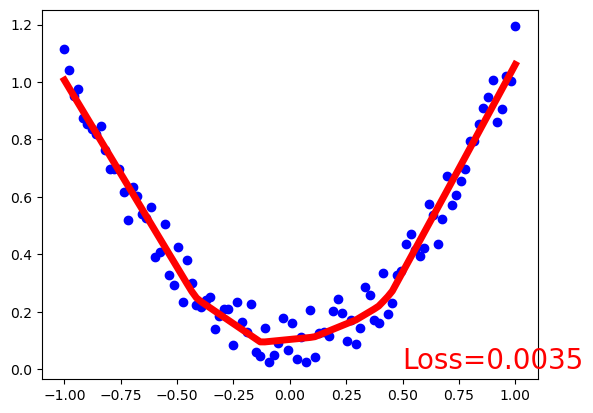

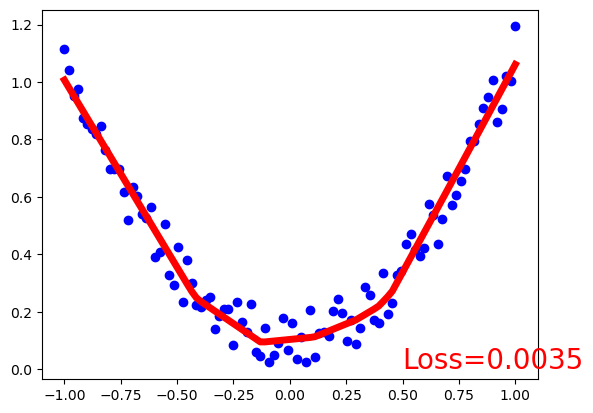

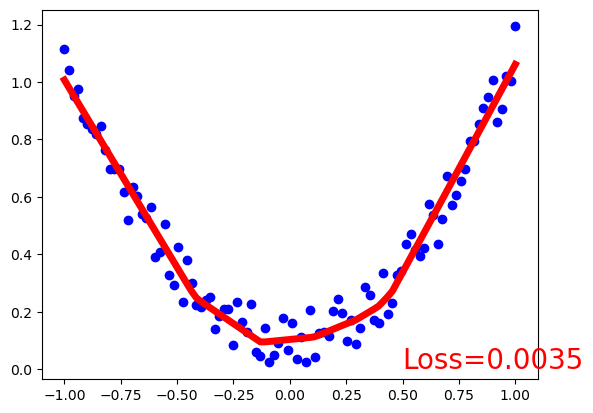

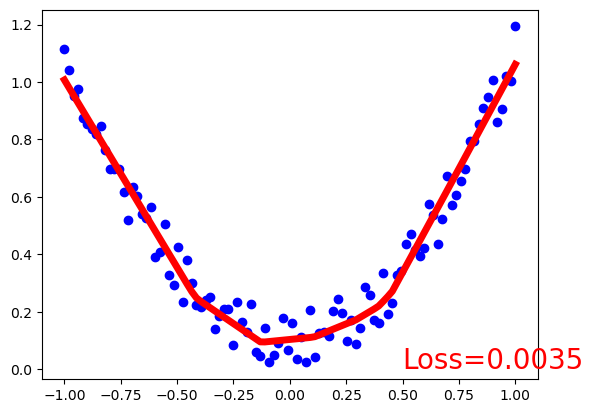

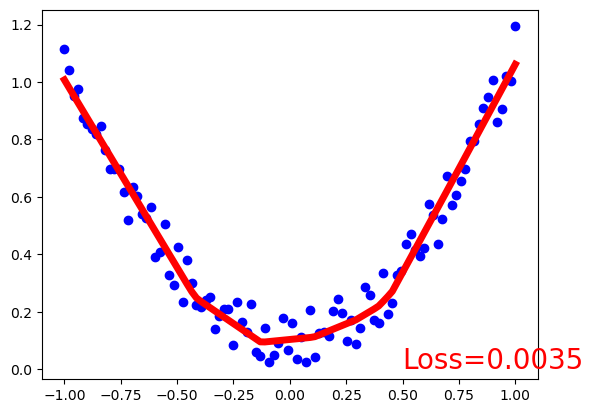

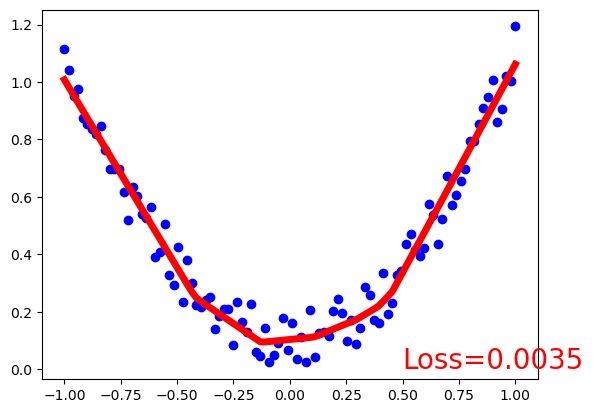

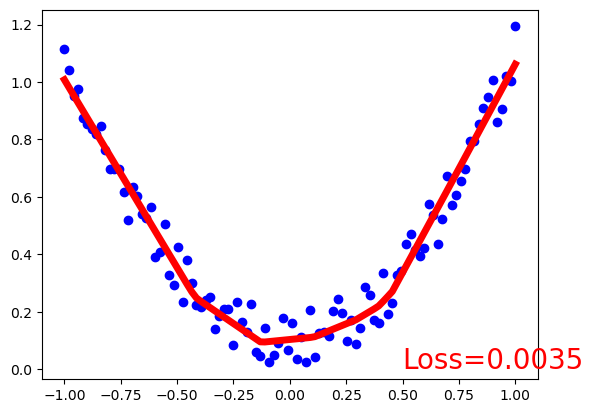

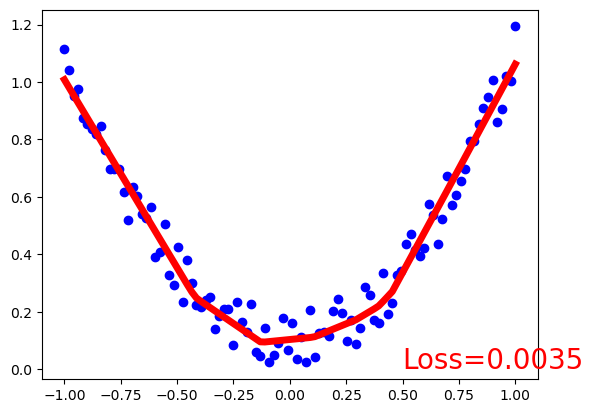

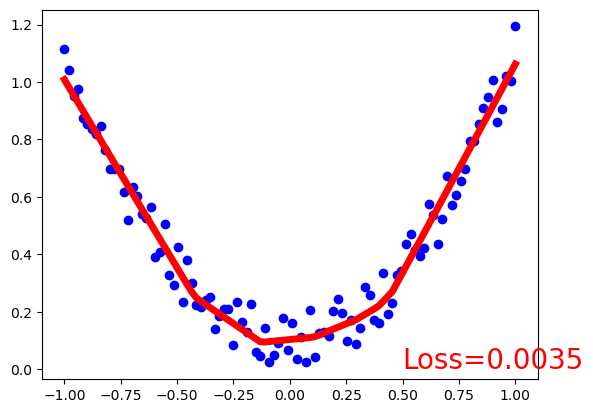

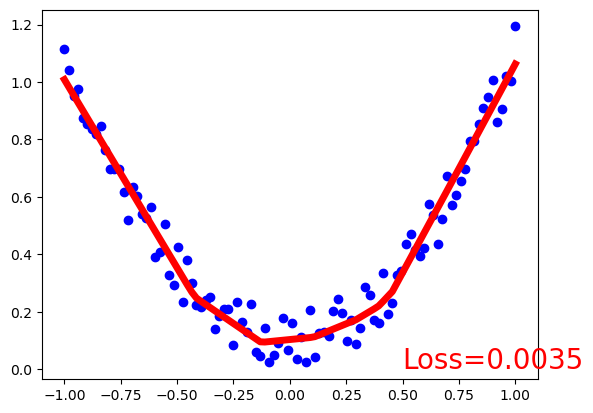

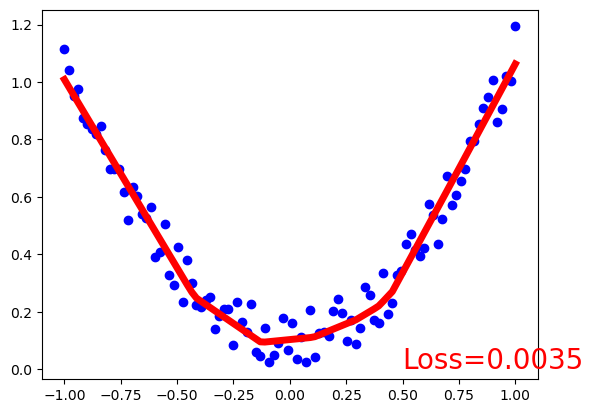

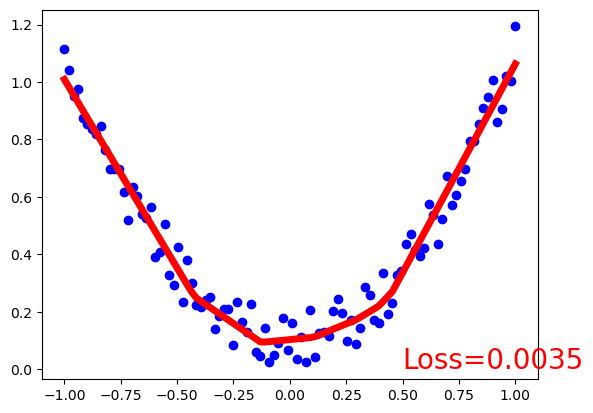

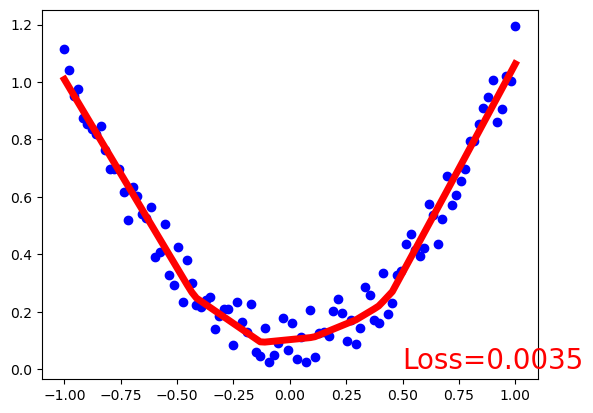

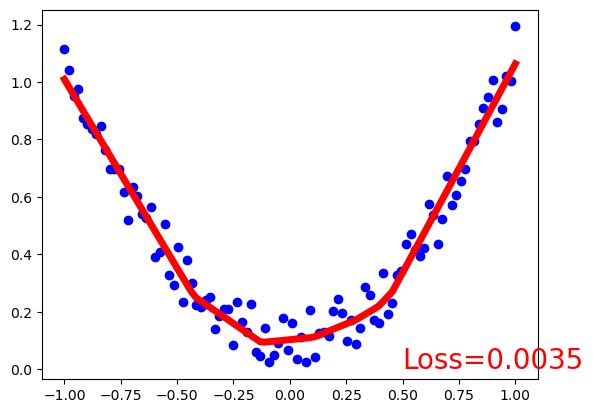

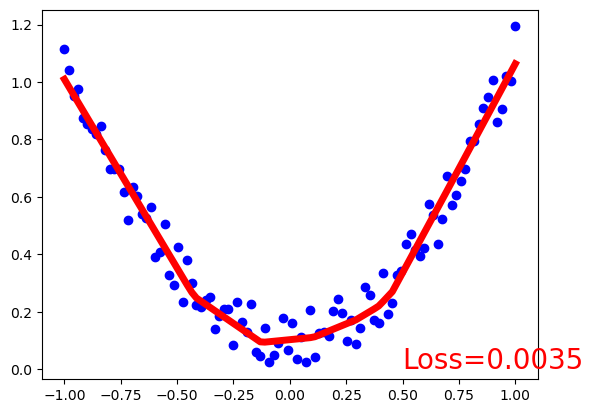

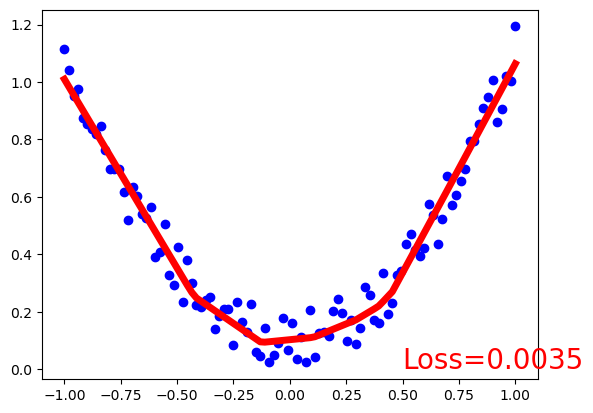

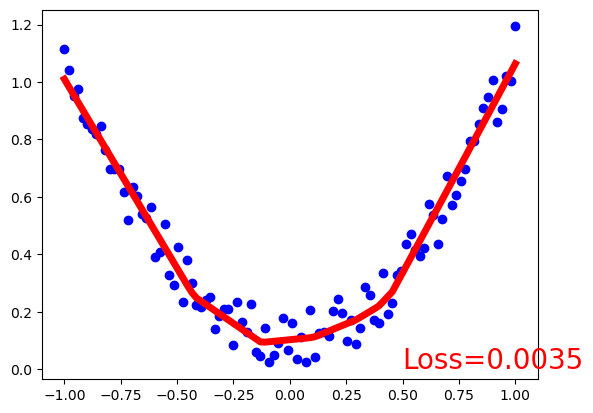

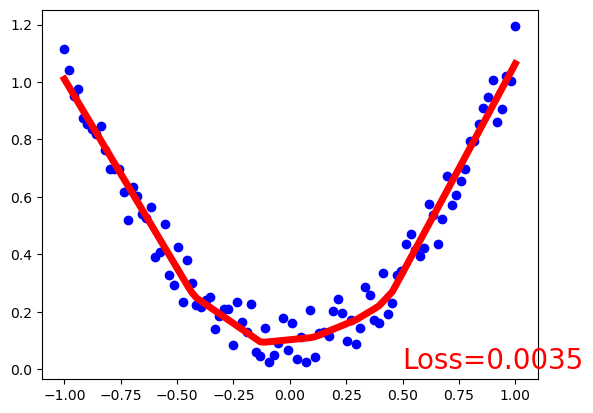

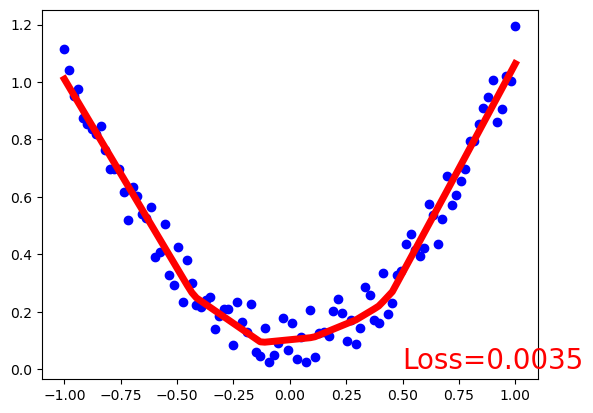

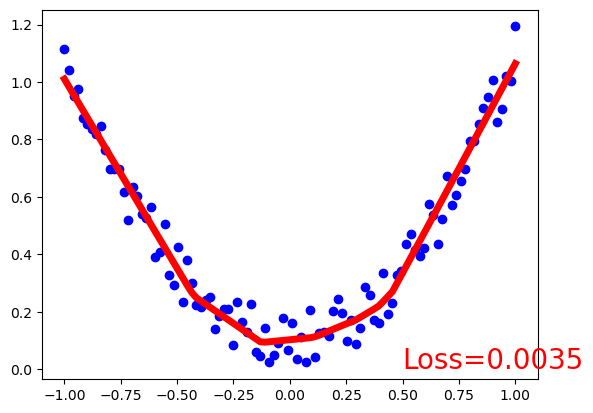

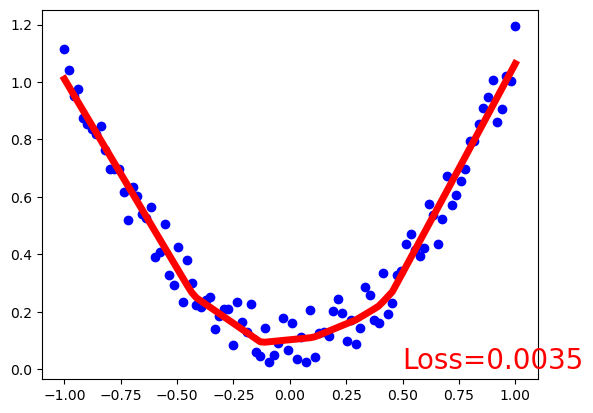

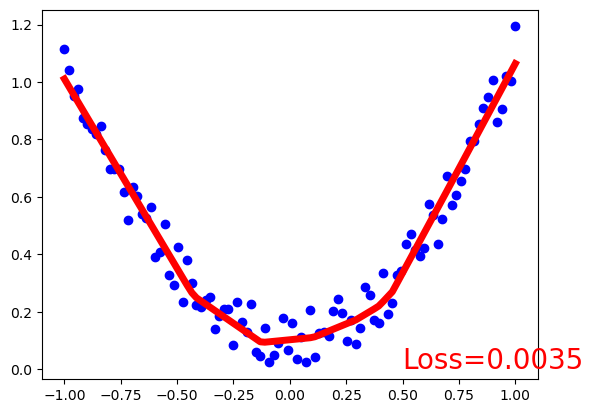

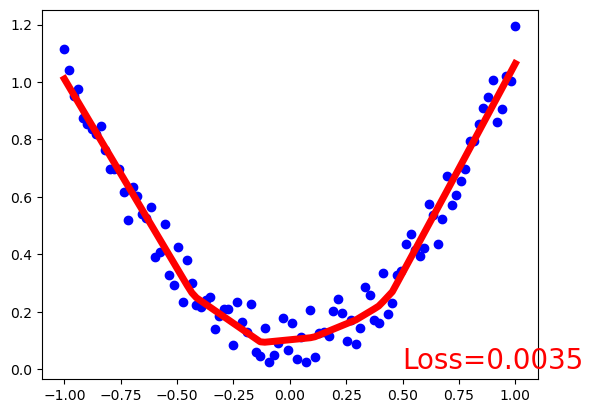

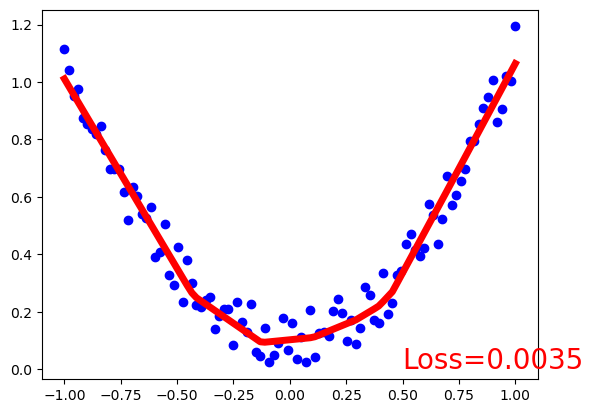

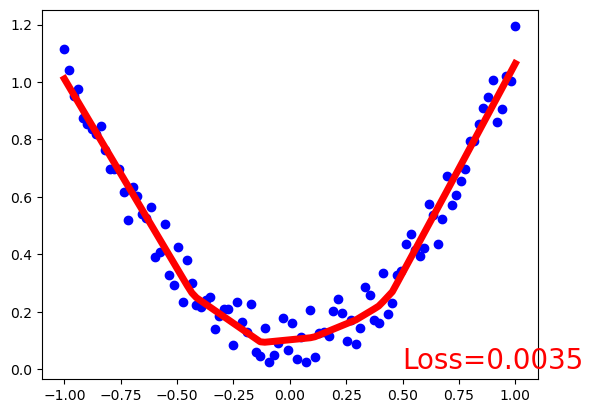

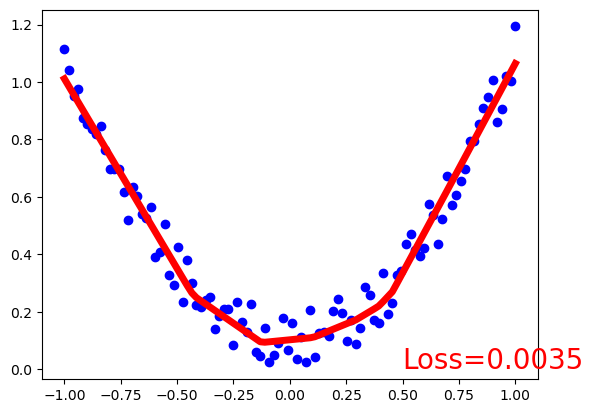

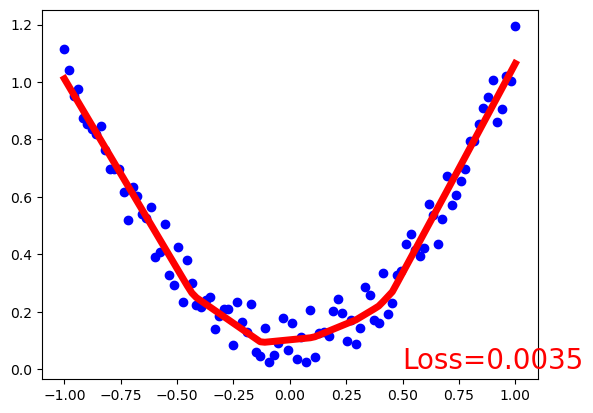

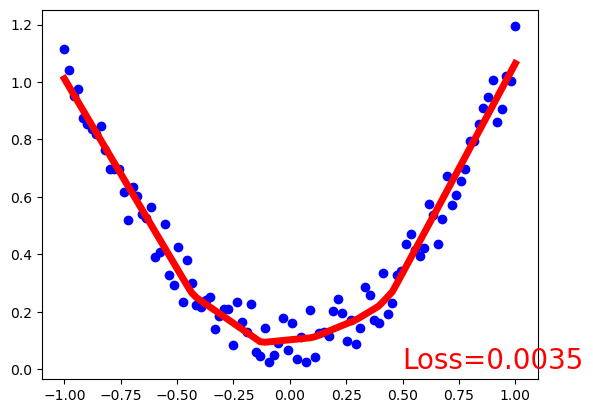

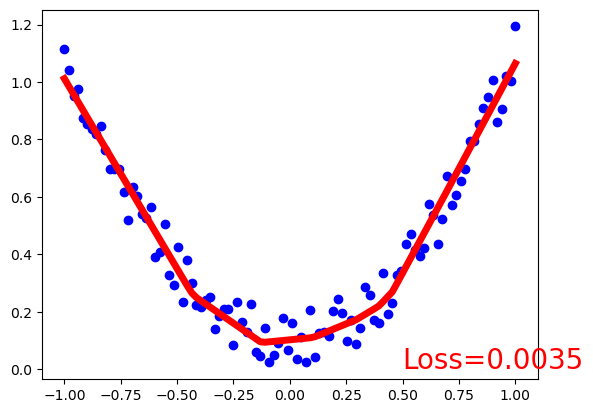

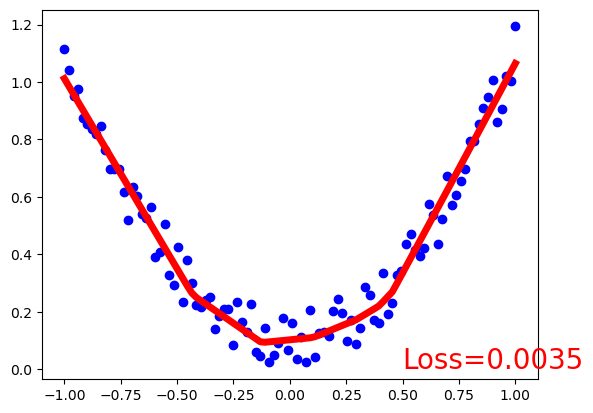

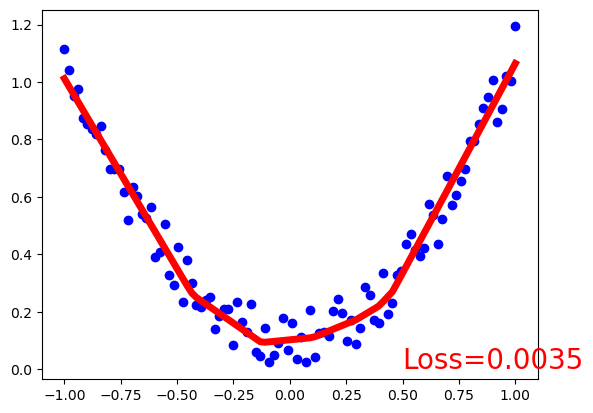

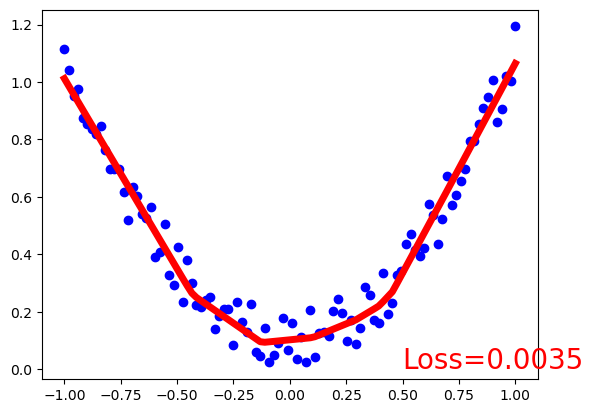

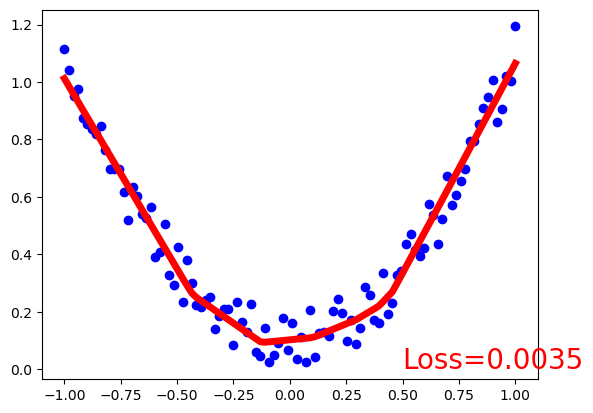

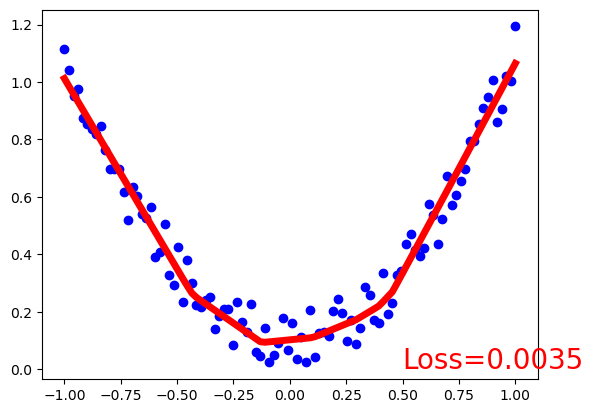

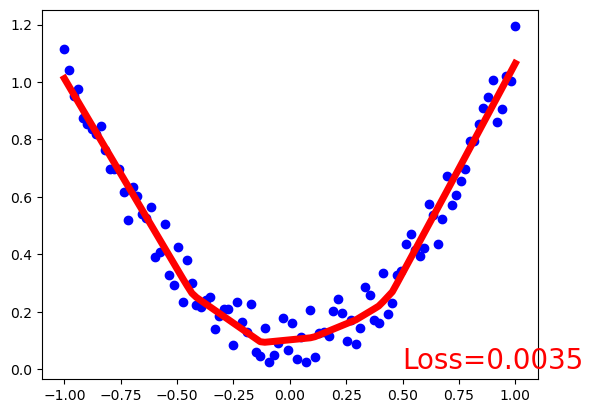

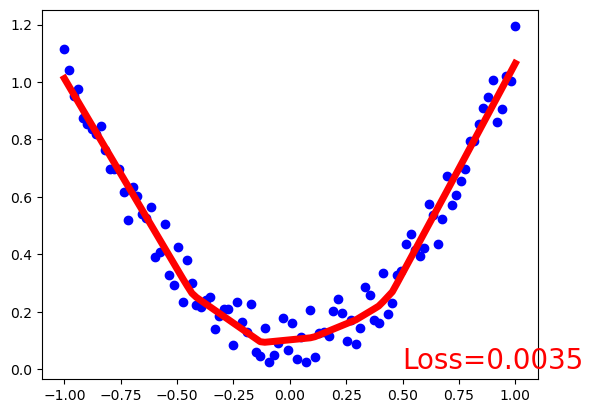

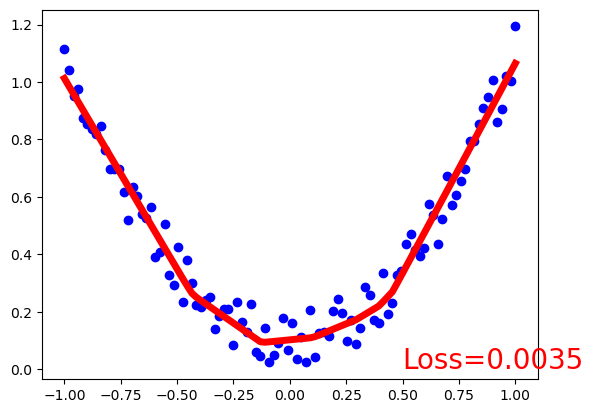

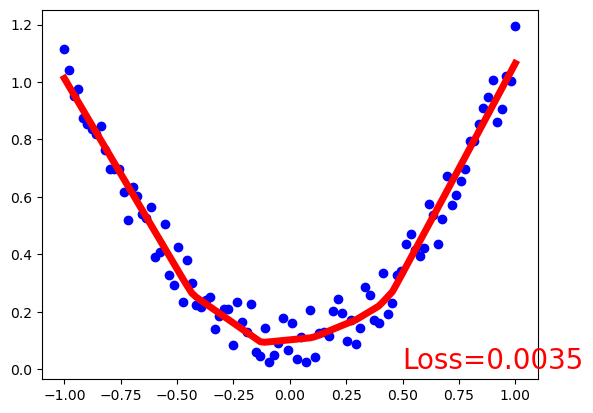

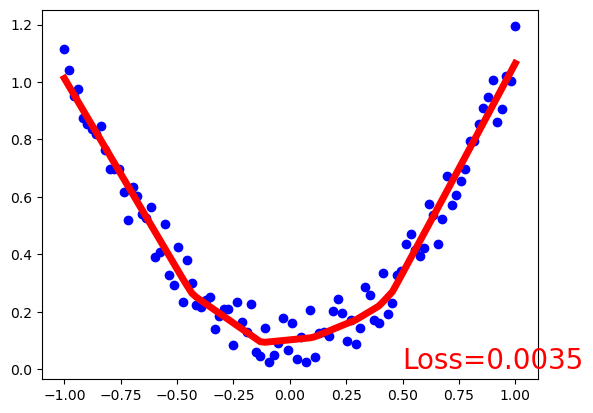

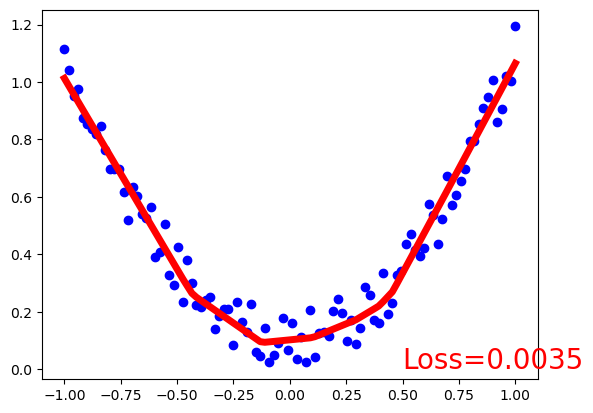

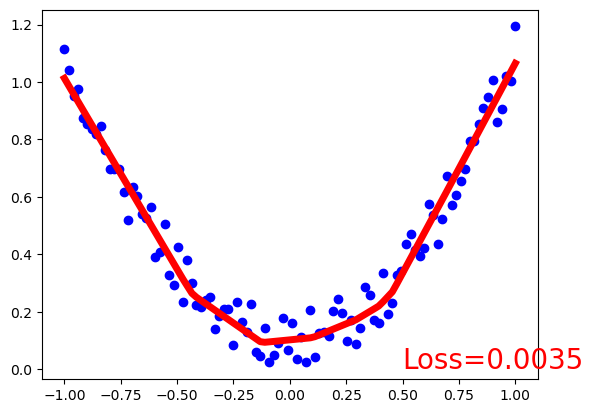

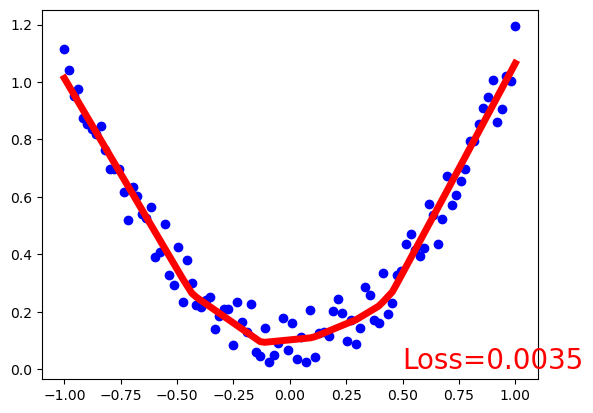

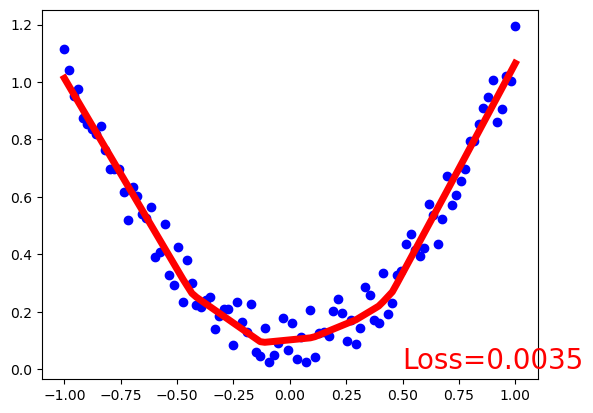

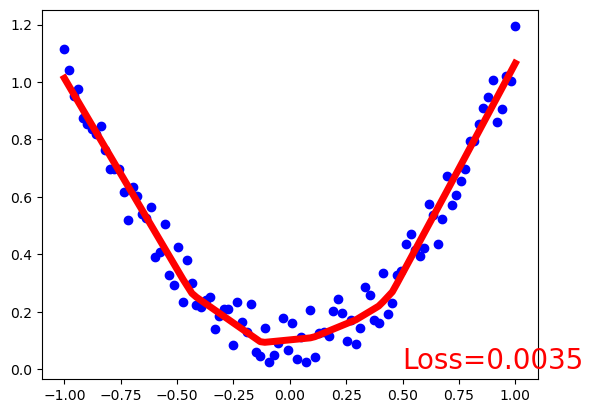

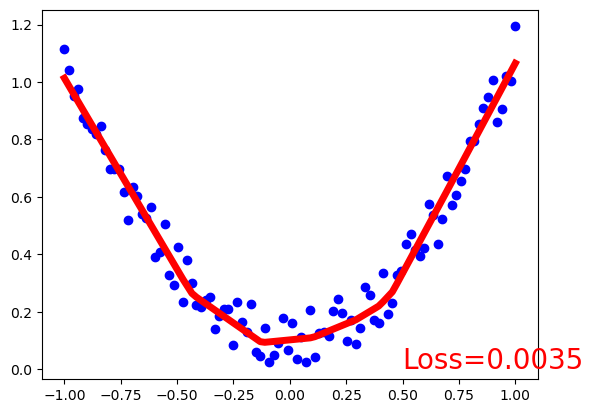

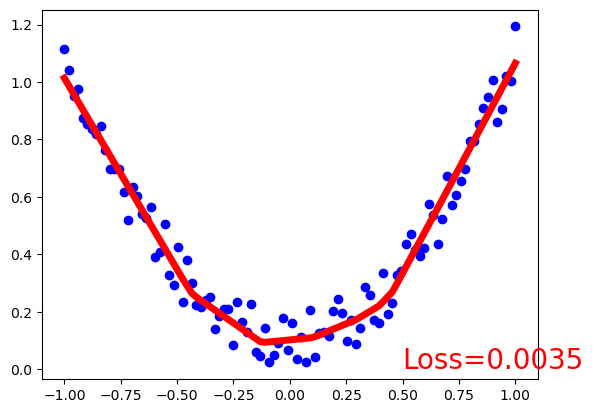

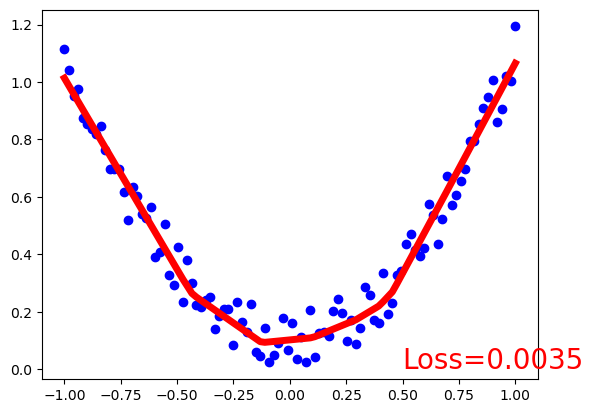

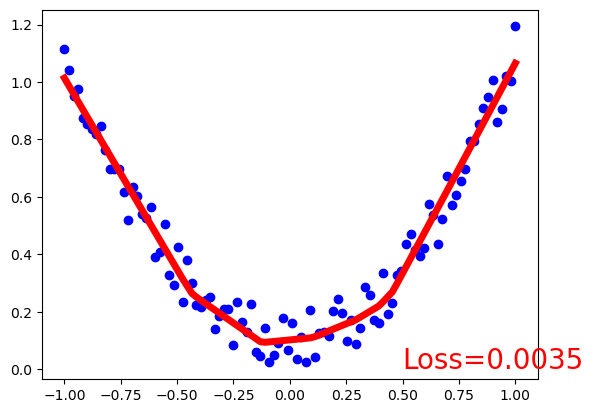

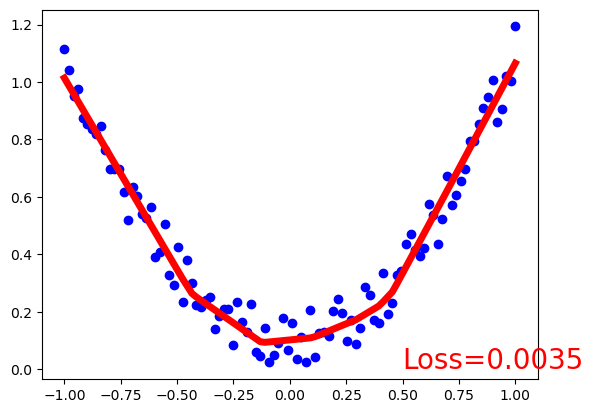

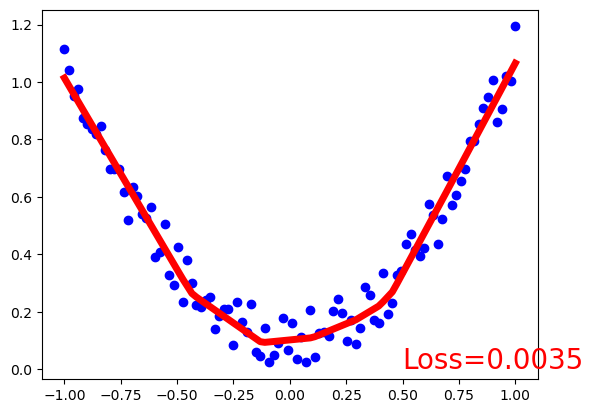

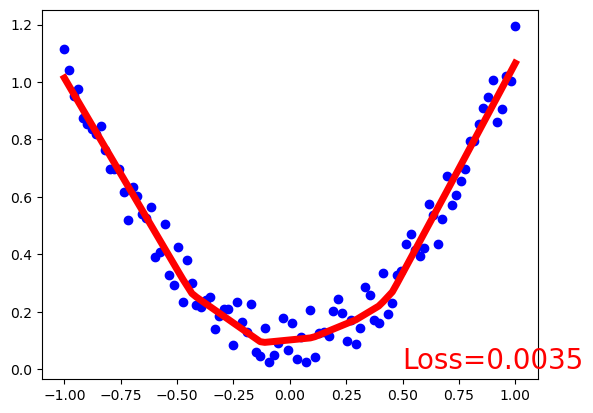

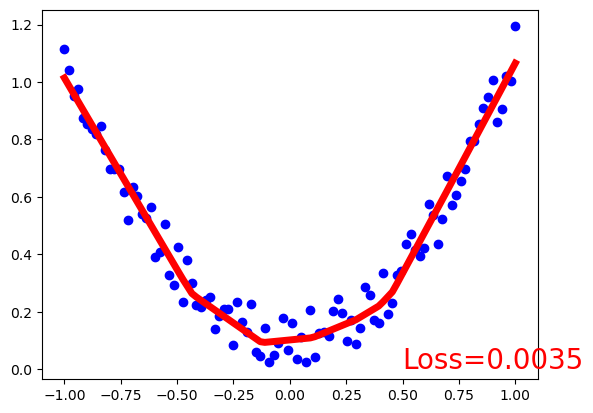

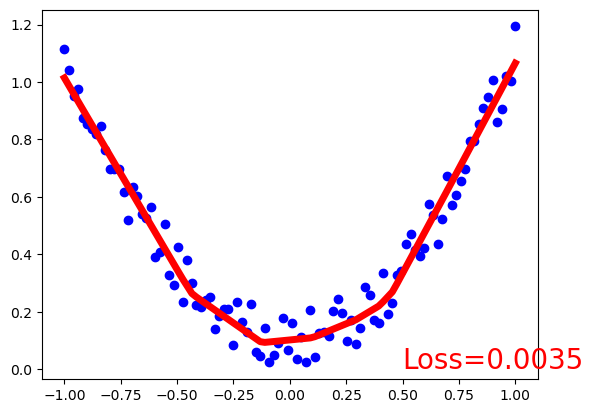

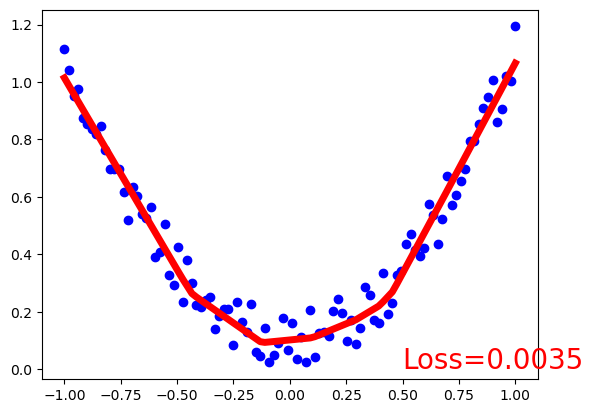

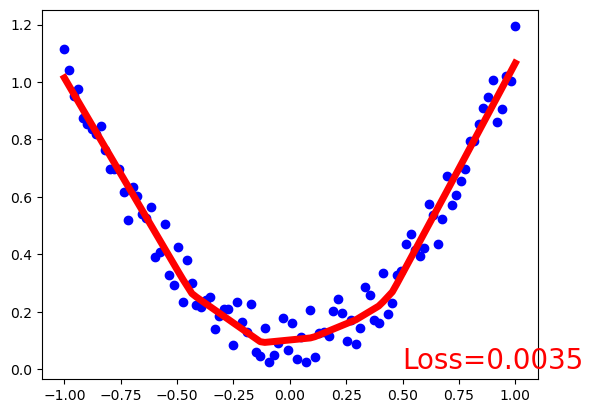

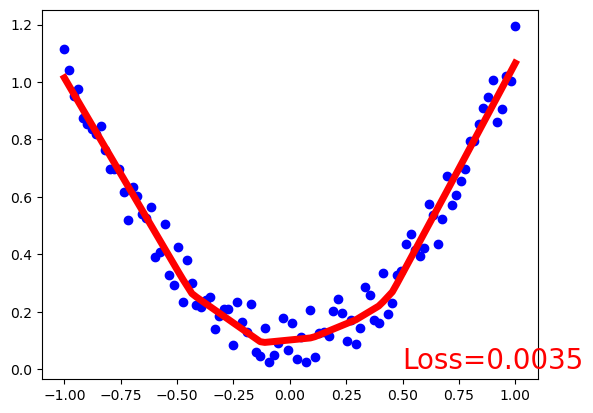

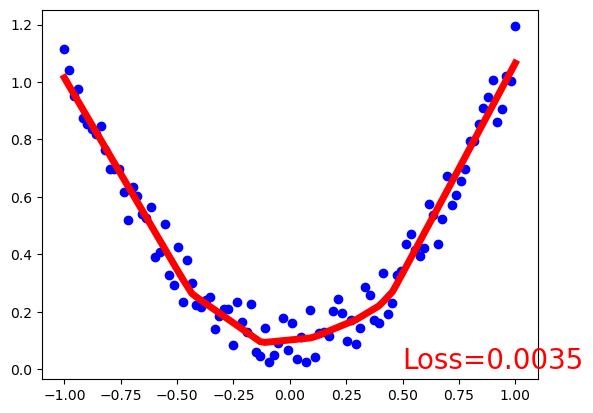

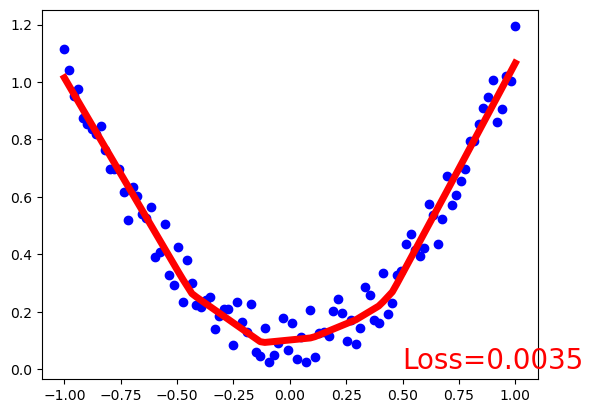

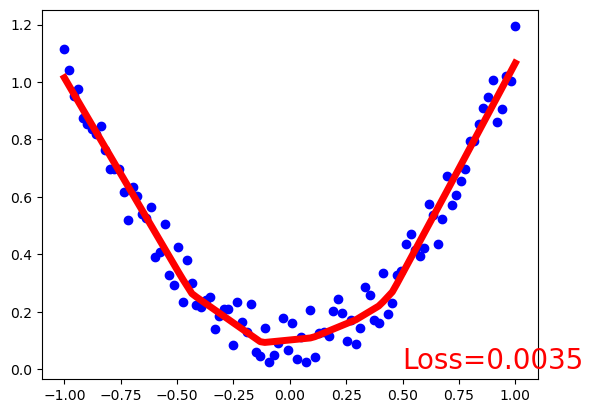

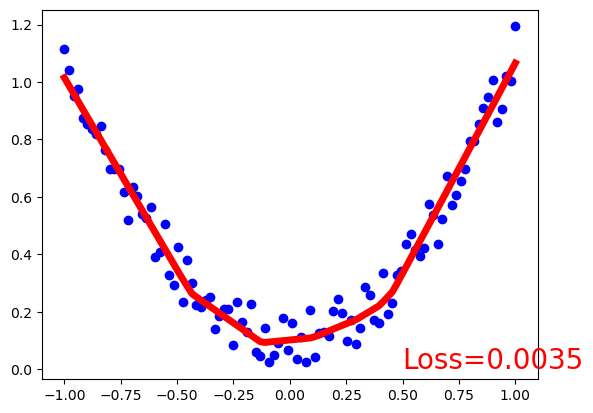

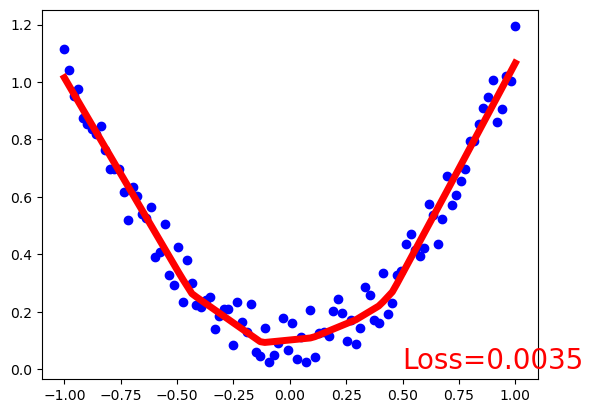

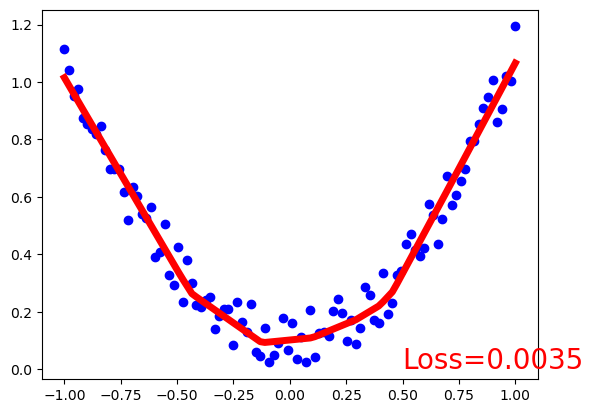

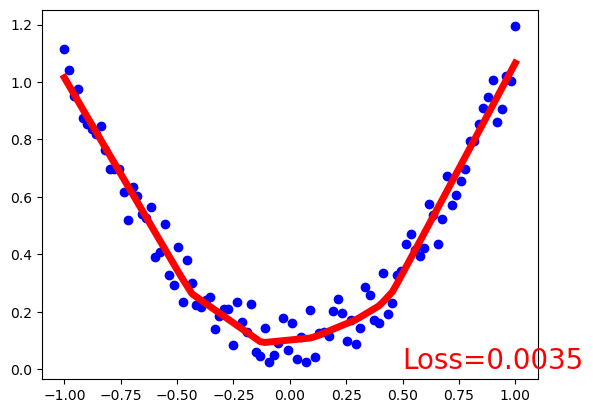

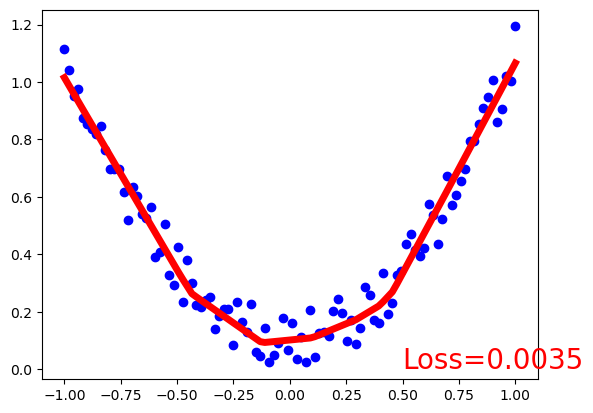

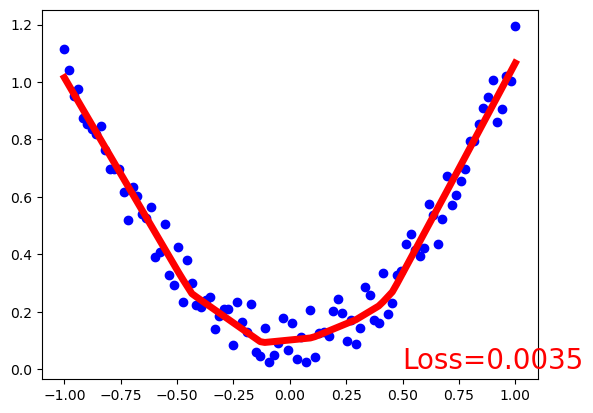

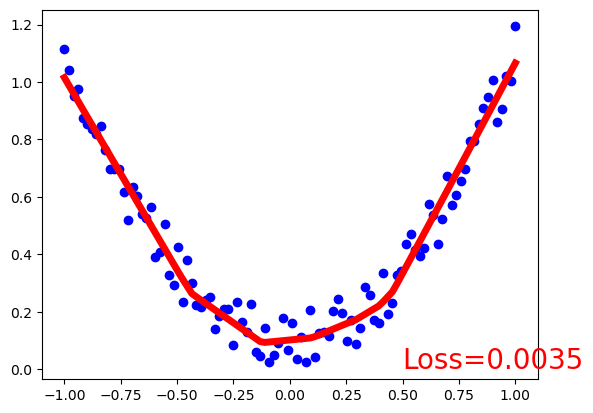

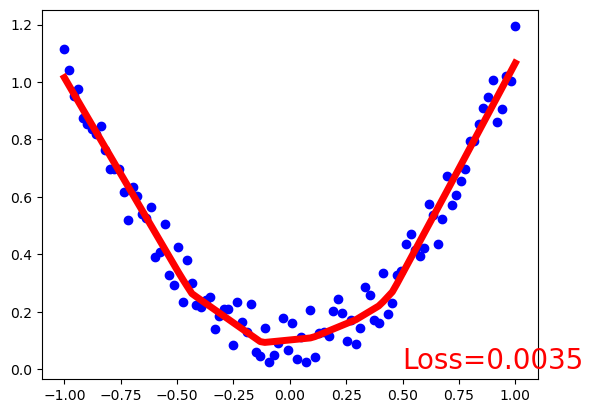

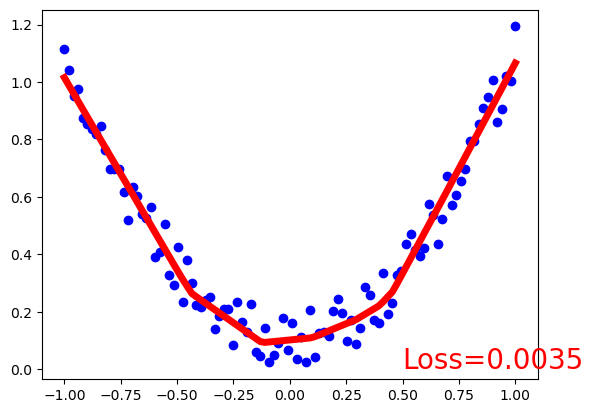

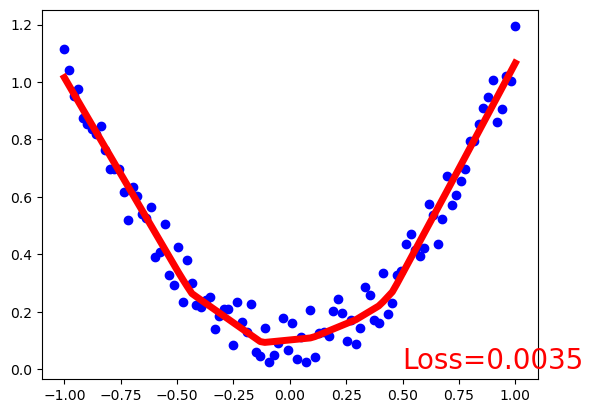

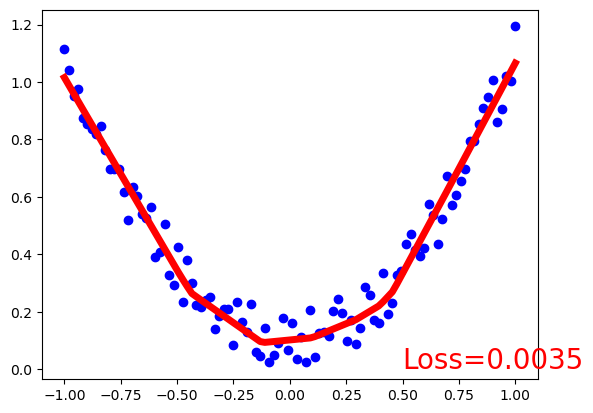

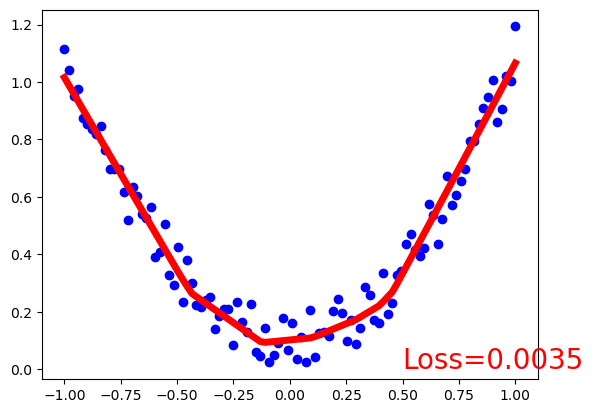

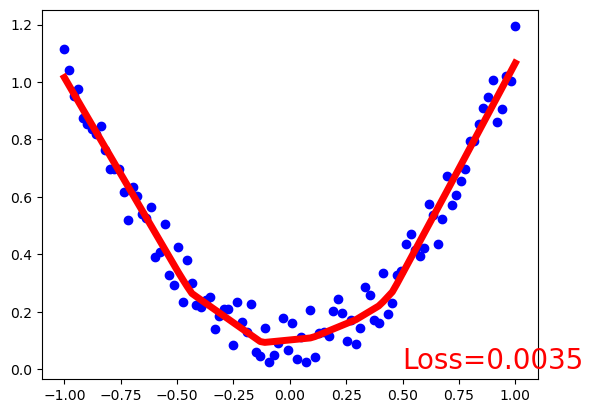

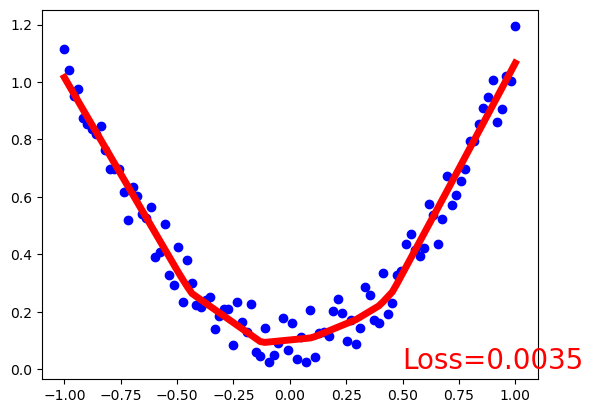

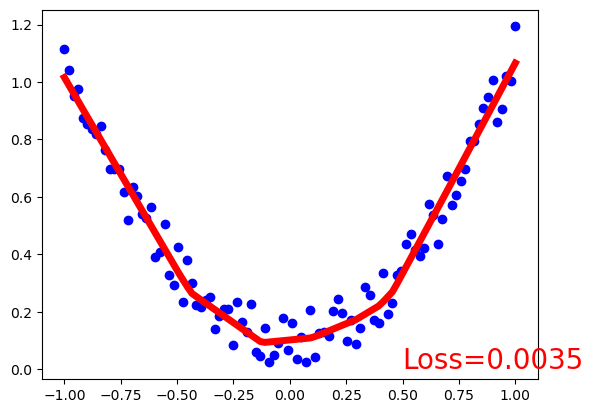

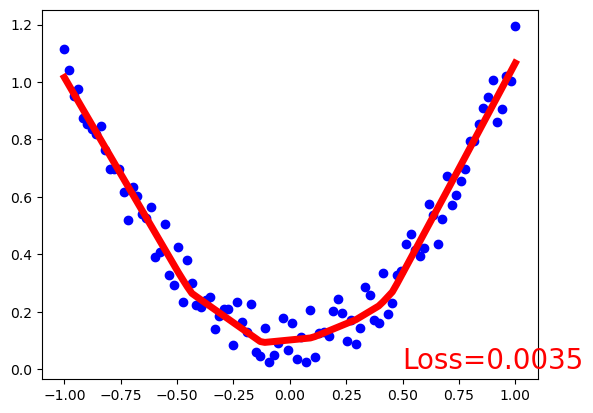

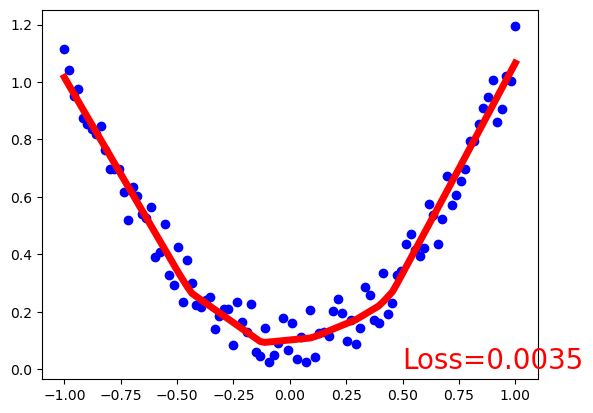

In [8]:
plt.ion()   # 画图
for t in range(500):
    prediction = net(x)  # 喂给 net 训练数据 x, 输出预测值
    loss = loss_func(prediction, y)  # 计算两者的误差
    optimizer.zero_grad()  # 清空上一步的残余更新参数值
    loss.backward()  # 误差反向传播, 计算参数更新值
    optimizer.step()  # 将参数更新值施加到 net 的 parameters 上
    if t % 5 == 0:
        plt.cla()
        plt.plot(x.data.numpy(), y.data.numpy(), 'bo')
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.05)
plt.ioff()
plt.show()

#### 4.3 网络参数

In [17]:
print(net)

for param in net.parameters():
    print(param)

for name,parameters in net.named_parameters():
    print(name,':',parameters.size())

w1 = net.state_dict()['0.weight']

0.weight : torch.Size([20, 1])
0.bias : torch.Size([20])
2.weight : torch.Size([10, 20])
2.bias : torch.Size([10])
4.weight : torch.Size([1, 10])
4.bias : torch.Size([1])


In [18]:
torch.save(net, 'net.pkl')  # 保存整个网络
net2 = torch.load('net.pkl') # 读取整个网络

In [19]:
torch.save(net.state_dict(), 'net_params.pkl')   # 只保存网络中的参数 (速度快, 占内存少)
net3 = nn.Sequential(
    nn.Linear(1, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)                           # 重新建立网络并读入参数
net3.load_state_dict(torch.load('net_params.pkl'))

<All keys matched successfully>

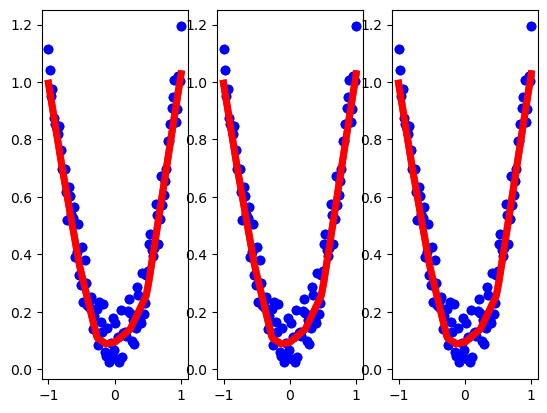

In [22]:
prediction2 = net2(x)
prediction3 = net3(x)
prediction1 = net(x)

plt.figure(1)
plt.subplot(1,3,1)
plt.plot(x.data.numpy(), y.data.numpy(), 'bo')
plt.plot(x.data.numpy(), prediction1.data.numpy(), 'r-', lw=5)
plt.subplot(1,3,2)
plt.plot(x.data.numpy(), y.data.numpy(), 'bo')
plt.plot(x.data.numpy(), prediction2.data.numpy(), 'r-', lw=5)
plt.subplot(1,3,3)
plt.plot(x.data.numpy(), y.data.numpy(), 'bo')
plt.plot(x.data.numpy(), prediction3.data.numpy(), 'r-', lw=5)
plt.show()

In [25]:
print(prediction1.data.numpy()[:10].T)

[[0.9955024  0.9666686  0.9378349  0.90900105 0.8801672  0.8513335
  0.82249963 0.7936659  0.7648322  0.7359984 ]]


In [26]:
print(prediction2.data.numpy()[:10].T)

[[0.9955024  0.9666686  0.9378349  0.90900105 0.8801672  0.8513335
  0.82249963 0.7936659  0.7648322  0.7359984 ]]


In [27]:
print(prediction3.data.numpy()[:10].T)

[[0.9955024  0.9666686  0.9378349  0.90900105 0.8801672  0.8513335
  0.82249963 0.7936659  0.7648322  0.7359984 ]]
